# Stats and Public Health Part 1

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##### the dataset was stored in the same file path as the notebook (missing the /data)

In [4]:
mosquito_data = pd.read_csv('mosquito_data.csv')

### Part-1: 1.What is the shape of the dataframe?

In [5]:
mosquito_data.shape

(18495, 13)

Part-1: 2.Convert the 'Date' column to have a datetime format.

In [6]:
mosquito_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [7]:
mosquito_data['Date'] = pd.to_datetime(mosquito_data['Date'])

In [8]:
mosquito_data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18495 entries, 0 to 18494
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
18495 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.6 KB


### Part-1: 3.Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

### Numeric: 1.Mosquito Numbe   2.Year  /  Categorical : 3.Trap   4.WNV Present
        

In [9]:
#Exploring Mosquito numbers column first: storing numerical values 
mosquito_data['Mosquito number'].describe()

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

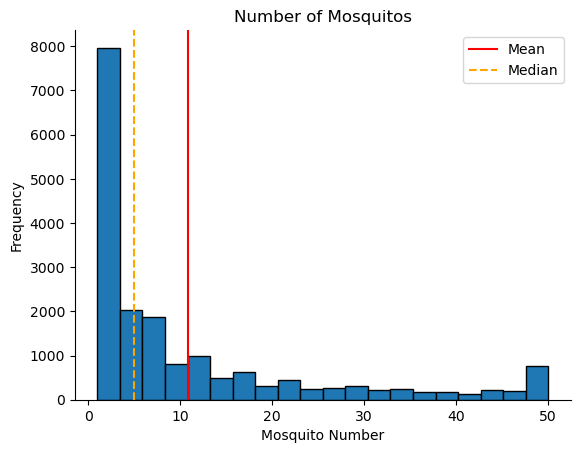

In [10]:
#Potting a Histogram to visualize the distribution: the data is skewed to the left
plt.figure()
plt.hist(mosquito_data['Mosquito number'], bins=20, edgecolor = 'Black')

plt.axvline(mosquito_data['Mosquito number'].mean(), color = 'red', label = 'Mean')
plt.axvline(mosquito_data['Mosquito number'].median(), color = 'orange' , label = 'Median', linestyle = '--')

plt.title('Number of Mosquitos')
plt.xlabel('Mosquito Number')
plt.ylabel('Frequency')
plt.legend()
sns.despine()
plt.show()

In [11]:
#Exploring Year column: storing numberical year values
mosquito_data['Year'].describe()

count    18495.000000
mean      2012.905812
std          3.725857
min       2007.000000
25%       2010.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64

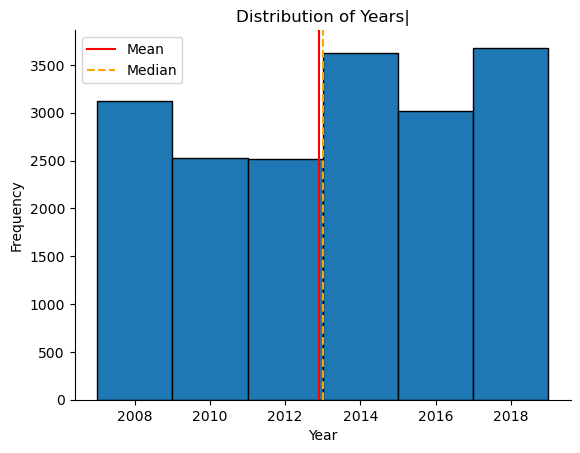

In [12]:
#Potting a Histogram to visualize the distribution: even distribution throughout the years
plt.figure()
plt.hist(mosquito_data['Year'], bins=6, edgecolor = 'Black')

plt.axvline(mosquito_data['Year'].mean(), color = 'red', label = 'Mean')
plt.axvline(mosquito_data['Year'].median(), color = 'orange' , label = 'Median', linestyle = '--')

plt.title('Distribution of Years|')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
sns.despine()
plt.show()

In [13]:
#Exploring Trap column: storing categorical values
mosquito_data['Trap'].describe()

count     18495
unique      190
top        T002
freq        406
Name: Trap, dtype: object

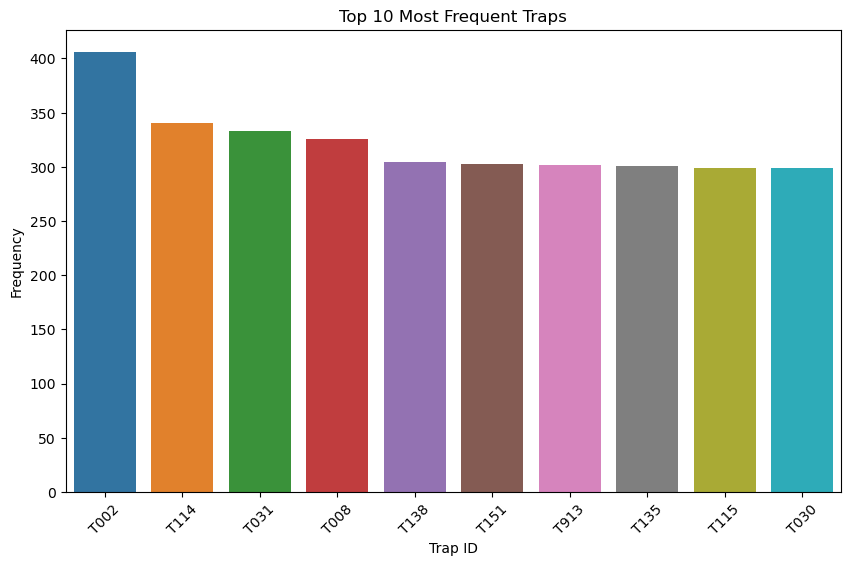

In [97]:
# Get the counts of each unique value in the 'Trap' column
trap_counts = mosquito_data['Trap'].value_counts().head(10)  # Considering top 10 for better visualization

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=trap_counts.index, y=trap_counts.values)
plt.title('Top 10 Most Frequent Traps')
plt.xlabel('Trap ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:
#Exploring WNV Present column: storing categorical values
mosquito_data['WNV Present'].describe()

count        18495
unique           2
top       negative
freq         14501
Name: WNV Present, dtype: object

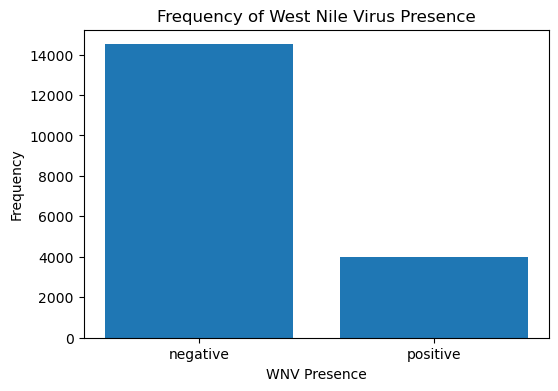

In [16]:
# Get the counts of each unique value in the 'WNV Present' column: there seems to be more negative values than positive
wnv_counts = mosquito_data['WNV Present'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(wnv_counts.index, wnv_counts.values)
plt.title('Frequency of West Nile Virus Presence')
plt.xlabel('WNV Presence')
plt.ylabel('Frequency')
plt.show()


### Part-1: 4.Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [10]:
# number of duplicated columns
mosquito_data.duplicated().sum()

658

In [11]:
# dropping the duplicated columns and assigning it to a new dataset
clean_mosquito_data = mosquito_data.drop_duplicates()

In [12]:
# checking to see if there are duplicated columns
clean_mosquito_data.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [13]:
clean_mosquito_data.shape

(17837, 13)

In [14]:
# checking the duplicated the columns
clean_mosquito_data.duplicated().sum()

0

### part-1: 5.Are there any null values in the dataframe? If so, deal with them appropriately.

In [22]:
clean_mosquito_data.isnull().sum()/len((mosquito_data))*100

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.25196
Lon                12.25196
dtype: float64

##### since the location (Latitude and longitude) are missing in 12% of the data and for most parts in the analysis they are not
##### critical i chose to replace them with the median value. but later when plotting the map this values were dropped to show a 
##### realistic representaton of the locations

In [23]:
clean_mosquito_data['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

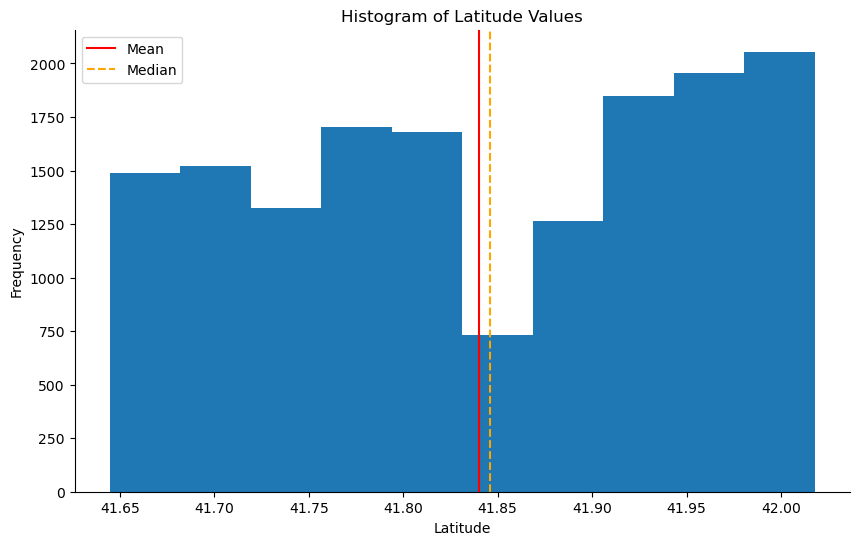

In [16]:
# checking the distribution of the latitude column
plt.figure(figsize=(10, 6))

plt.hist(clean_mosquito_data['Lat'], bins=10)  # You can adjust the number of bins

plt.axvline(clean_mosquito_data['Lat'].mean(), color = 'red', label = 'Mean')
plt.axvline(clean_mosquito_data['Lat'].median(), color = 'orange' , label = 'Median', linestyle = '--')


plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude Values')
sns.despine()
plt.legend()
plt.show()


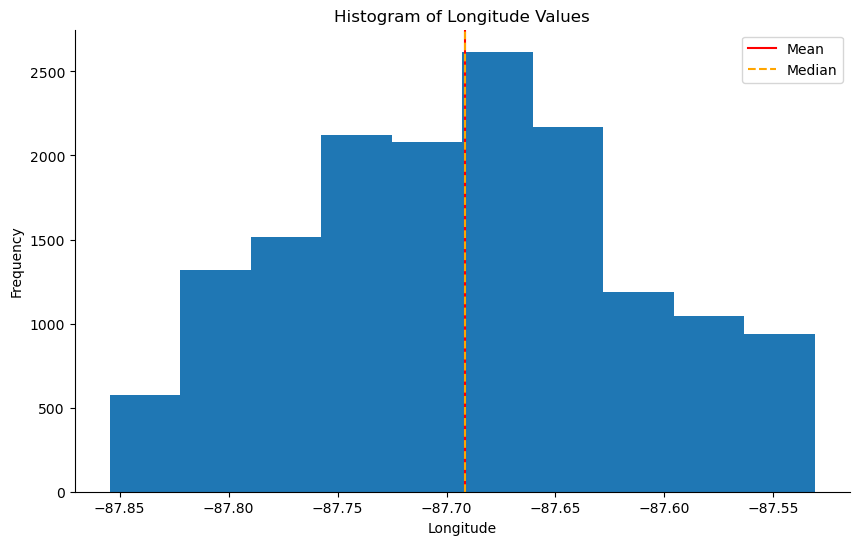

In [17]:
# checking the dictribution of the longitude column
plt.figure(figsize=(10, 6))

plt.hist(clean_mosquito_data['Lon'], bins=10)  # You can adjust the number of bins

plt.axvline(clean_mosquito_data['Lon'].mean(), color = 'red', label = 'Mean')
plt.axvline(clean_mosquito_data['Lon'].median(), color = 'orange' , label = 'Median', linestyle = '--')


plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude Values')
sns.despine()
plt.legend()
plt.show()


In [18]:
clean_mosquito_data['Lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

In [19]:
# replacing the missing value with the median.

# Calculate the median
lat_median = clean_mosquito_data['Lat'].median()
lon_median = clean_mosquito_data['Lon'].median()

# Fill missing values with the median
clean_mosquito_data['Lat'].fillna(lat_median, inplace=True)
clean_mosquito_data['Lon'].fillna(lon_median, inplace=True)


C:\Users\Sami\AppData\Local\Temp\ipykernel_53896\233482910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mosquito_data['Lat'].fillna(lat_median, inplace=True)
C:\Users\Sami\AppData\Local\Temp\ipykernel_53896\233482910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mosquito_data['Lon'].fillna(lon_median, inplace=True)


In [20]:
# now checking to see if the replacement changed the data distribution significantly
# Longitude
clean_mosquito_data['Lon'].describe()

count    17837.000000
mean       -87.691650
std          0.071518
min        -87.854473
25%        -87.736925
50%        -87.691698
75%        -87.648925
max        -87.531051
Name: Lon, dtype: float64

In [21]:
# Latitude
clean_mosquito_data['Lat'].describe()

count    17837.000000
mean        41.840694
std          0.104076
min         41.644720
25%         41.763371
50%         41.845715
75%         41.923895
max         42.017801
Name: Lat, dtype: float64

In [ ]:
# the data imputation seems to be fitting well. moving on with the rest of the analysis. however when the location becomes
# in the analysis the rows with originally missing values were dropped

In [30]:
clean_mosquito_data.isnull().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

### Part-2: Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

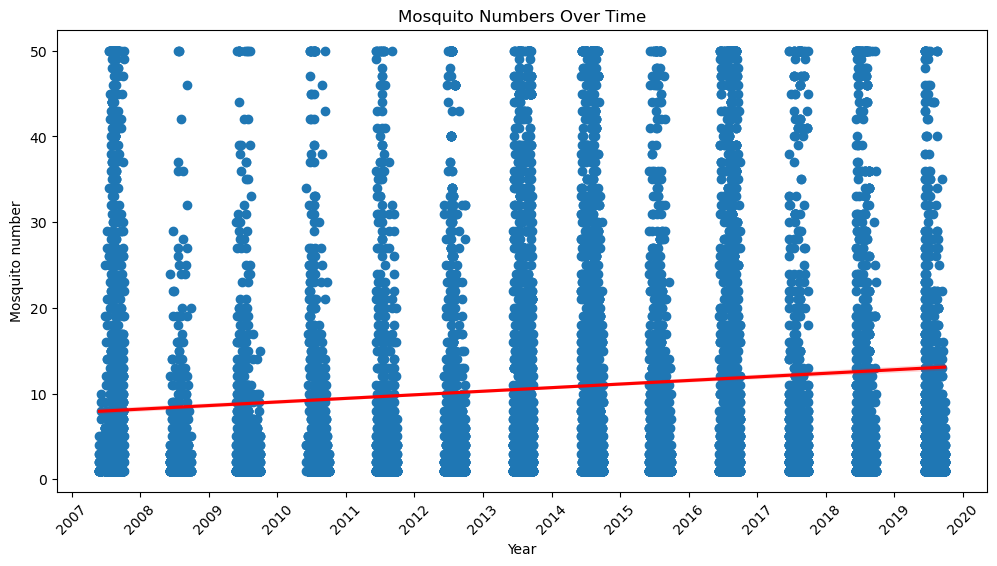

In [55]:
# there seeems to be a cyclic effect in the mosquito population with increase in some years (probably due to envirounmentall factors)
# and overal increase year over year in the population in general
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(x=clean_mosquito_data['Date'], y=clean_mosquito_data['Mosquito number'])

# Set the major locator to years and formatter to show only year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Show only year

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adding titles and labels
plt.title('Mosquito Numbers Over Time')
plt.xlabel('Year')
plt.ylabel('Mosquito Number')

# Optional: Adding a trend line
sns.regplot(x=mdates.date2num(clean_mosquito_data['Date']), y=clean_mosquito_data['Mosquito number'], 
            scatter=False, color='red')  # Adjust color and label as needed

plt.show()


### Part-3: 1.Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

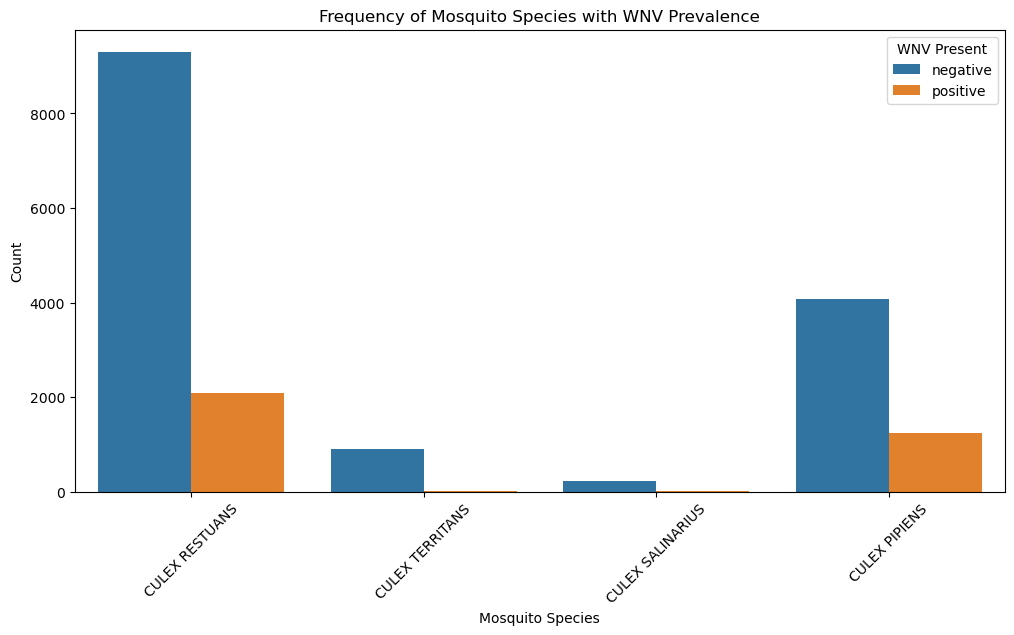

In [58]:
# comparing the number of negative and positive WNV presence in each species:
plt.figure(figsize=(12, 6))
sns.countplot(data=clean_mosquito_data, x='Species', hue='WNV Present')
plt.title('Frequency of Mosquito Species with WNV Prevalence')
plt.xlabel('Mosquito Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [66]:
#checking what percentage of each species is infected: Culex Pipiens are more suseptible to carry the virus. but Culex Restuans 
# have the highest number of infected flies.

# Count the number of positive cases for each species
positive_counts = clean_mosquito_data[clean_mosquito_data['WNV Present'] == 'positive'].groupby('Species').size()

# Count the total number of cases for each species
total_counts = clean_mosquito_data.groupby('Species').size()

# Calculate the percentage
percentage_wnv_positive = (positive_counts / total_counts) * 100

percentage_wnv_positive


Species
CULEX PIPIENS       23.291282
CULEX RESTUANS      18.248880
CULEX SALINARIUS     3.153153
CULEX TERRITANS      1.526718
dtype: float64

### part-3: 2.Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

In [68]:
clean_mosquito_data.head(3)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.845715,-87.691698,9
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,9


In [88]:
# overal number of mosquitos per trap. Gravid has overall captured the most amount of mosquitos.

# Group by 'Trap type' and sum the 'Mosquito number' for each group
total_mosquito_by_trap = clean_mosquito_data.groupby('Trap type')['Mosquito number'].sum().reset_index()

total_mosquito_by_trap


,Trap type,Mosquito number
0,CDC,9514
1,GRAVID,171905
2,OVI,1
3,SENTINEL,5134


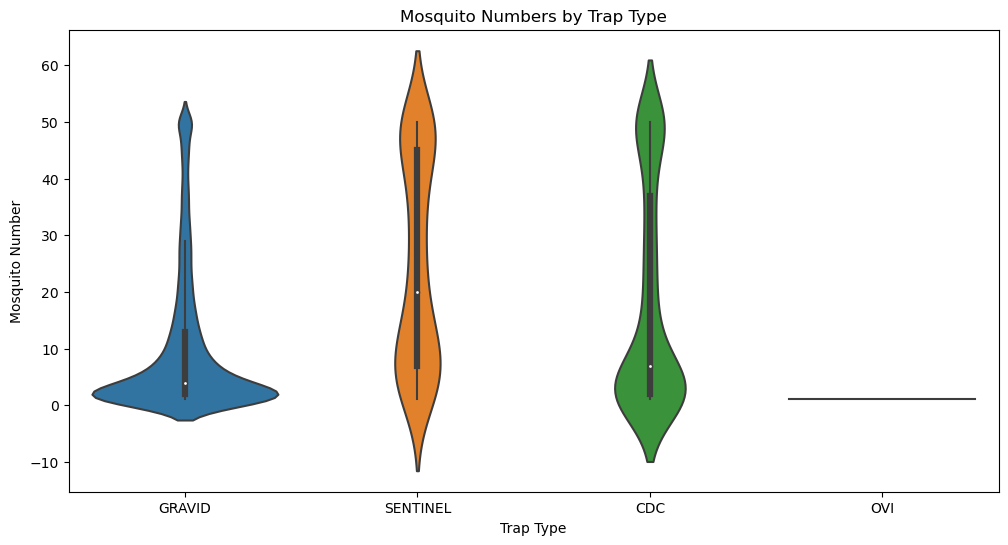

In [74]:
# with a violin plot shows both the distribution of data and its probability density.showing Gravid is more efficient in 
# capturing smaller number of mosquitos.However the plot misrepresents the total number of flies captured 
plt.figure(figsize=(12, 6))
sns.violinplot(x='Trap type', y='Mosquito number', data=clean_mosquito_data)
plt.title('Mosquito Numbers by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Mosquito Number')
plt.show()


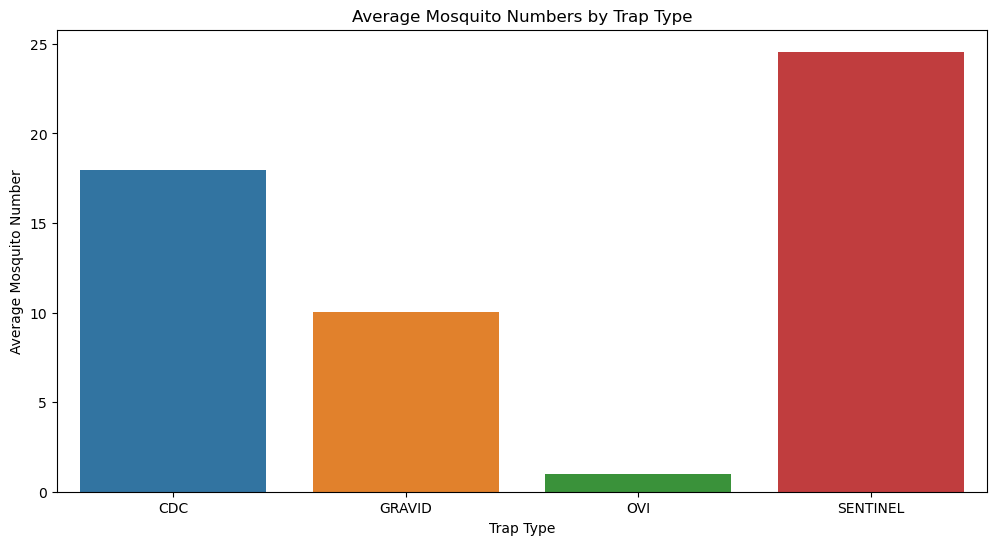

In [75]:
# using a barplot we can see that Sentinel traps are more efficeint in capturing more mosquitos per each trap

avg_mosquito_by_trap = clean_mosquito_data.groupby('Trap type')['Mosquito number'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Trap type', y='Mosquito number', data=avg_mosquito_by_trap)
plt.title('Average Mosquito Numbers by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Average Mosquito Number')
plt.show()


### part-3: 3. Using an appropriate visual, come up with an additional insight of your choice.

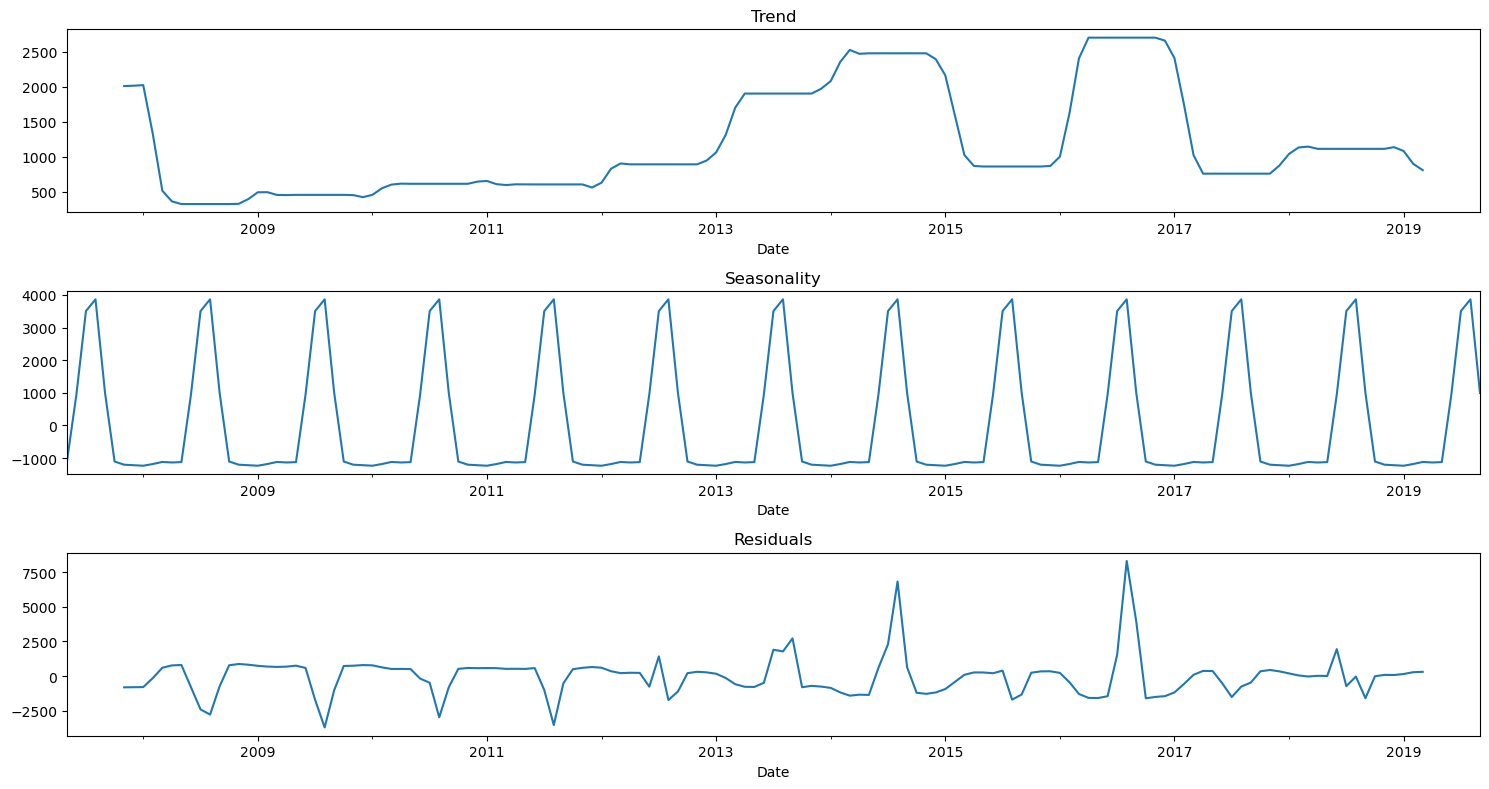

In [35]:
# plotting the cyclic and overal behaviour of the population. 
# ax1(the trend): shows the overal number of mosquitos over time.showing increases around 2014 and 2016.
# ax2(the seasonal): showing how the population changes overtime during the year
# ax3(the residual): showing how the population deviates from the trendline over time.


import statsmodels.api as sm

# Ensure 'Date' is in datetime format and set it as index
data_for_decomposition = clean_mosquito_data.set_index('Date')

# Resampling data by month and summing up mosquito numbers
monthly_data = data_for_decomposition['Mosquito number'].resample('M').sum()

# Time series decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')

# Plotting the decomposition
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition.trend.plot(ax=ax1)
decomposition.seasonal.plot(ax=ax2)
decomposition.resid.plot(ax=ax3)
ax1.set_title('Trend')
ax2.set_title('Seasonality')
ax3.set_title('Residuals')
plt.tight_layout()


In [32]:
pip install folium  

Note: you may need to restart the kernel to use updated packages.


In [36]:
# showing the heatmap of the flies in giving insight on the possible correlation with the location of the traps
# the data is not clear on the method that was used to place the traps.
import folium
from folium.plugins import HeatMap

# Filter the dataset for positive WNV cases
positive_cases = mosquito_data[mosquito_data['WNV Present'] == 'positive']

# Exclude rows where Lat or Lon is NaN (using the original data and dropping the Na rows )
positive_cases = positive_cases.dropna(subset=['Lat', 'Lon'])

# Create a map centered around an average location
map_center = [positive_cases['Lat'].mean(), positive_cases['Lon'].mean()]
map = folium.Map(location=map_center, zoom_start=11)

# Add the heat layer
heat_data = [[row['Lat'], row['Lon']] for index, row in positive_cases.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map
